In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv(r"C:\Users\Ritesh\Downloads\car data.csv" )
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.isna().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [11]:
print(df['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
print(df['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [15]:
from matplotlib import style

In [17]:
fuel_type = df['Fuel_Type']
seller_type = df['Seller_Type']
transmission_type = df['Transmission']
selling_price = df['Selling_Price']


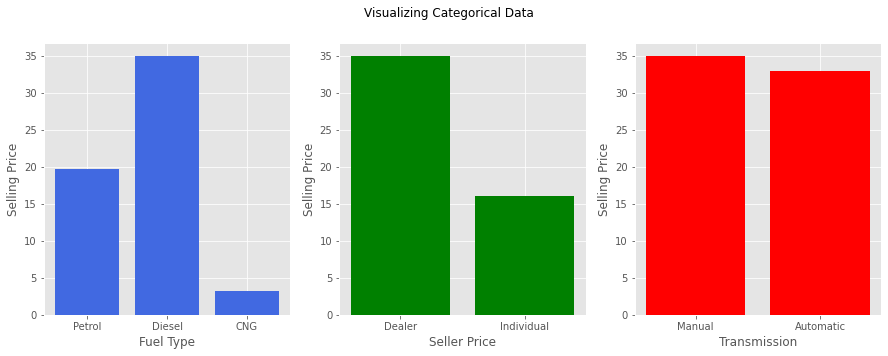

In [20]:
style.use('ggplot')
fig = plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Categorical Data")
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color = 'royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color = 'green')
plt.xlabel("Seller Price")
plt.ylabel("Selling Price")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color = 'red')
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

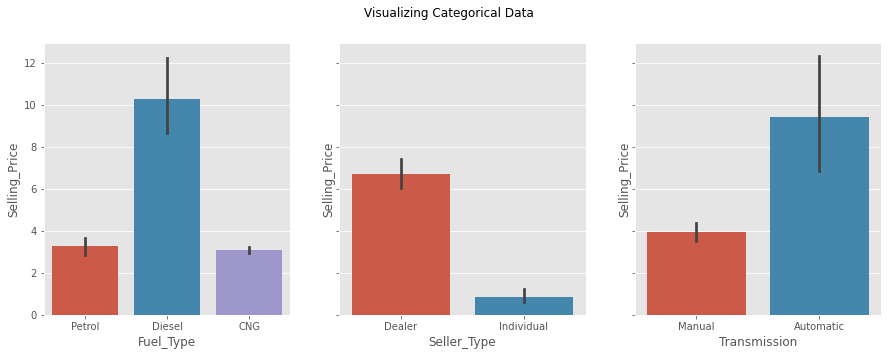

In [23]:
fig, axes = plt.subplots(1,3,figsize = (15,5),sharey = True)
fig.suptitle("Visualizing Categorical Data")
sns.barplot(x = fuel_type,y = selling_price,ax = axes[0])
sns.barplot(x = seller_type,y = selling_price,ax = axes[1])
sns.barplot(x = transmission_type,y = selling_price,ax = axes[2])


In [32]:
petrol_data = df.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

KeyError: ' Petrol'

In [31]:
seller_data = df.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.323077,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.490351,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,2.000000,1.000000


In [33]:
#manual encoding
df.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
#one hot encoding 
df = pd.get_dummies(df,columns = ['Seller_Type','Transmission'],drop_first = True)

In [34]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


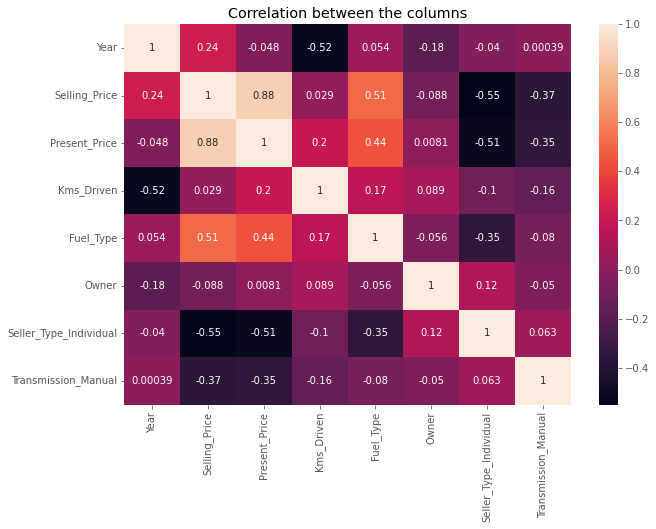

In [36]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the columns")
plt.show()

In [44]:
X = df.drop(['Car_Name','Selling_Price'],axis = 1)
Y = df['Selling_Price']
print("Shape of X is :",X.shape)
print("Shape of Y is :",Y.shape)

Shape of X is : (301, 7)
Shape of Y is : (301,)


In [45]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,0,1
1,2013,9.54,43000,1,0,0,1
2,2017,9.85,6900,0,0,0,1
3,2011,4.15,5200,0,0,0,1
4,2014,6.87,42450,1,0,0,1


In [46]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [62]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
print("MAE : ",metrics.mean_absolute_error(pred,y_test))
print("MSE : ",metrics.mean_squared_error(pred,y_test))
print("R2 score : ",metrics.r2_score(pred,y_test))

MAE :  1.1250277798961184
MSE :  2.338386001204175
R2 score :  0.8918522597531734


Text(0, 0.5, 'Actual Price')

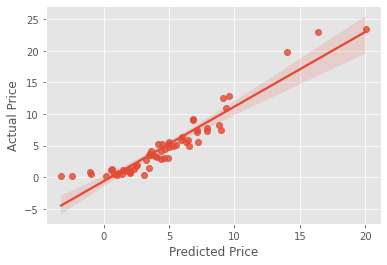

In [68]:
sns.regplot(x=pred,y = y_test)
plt.xlabel('Predicted Price')
plt.ylabel("Actual Price")